In [1]:
import pandas as pd 
import matplotlib as plt
import numpy as np 

In [2]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(filepath)

In [3]:
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [4]:
#Add column headers
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

### Identify and handle missing values

In [5]:
df.replace("?", np.nan, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [6]:
#Evaluating for Missing Data
missing_data = df.isnull()
missing_data.head(10) #output boolean value indicating missing data True = missing value

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
#Counting missing values in each column using for loop
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
symboling
False    204
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      40
Name: count, dtype: int64

make
make
False    204
Name: count, dtype: int64

fuel-type
fuel-type
False    204
Name: count, dtype: int64

aspiration
aspiration
False    204
Name: count, dtype: int64

num-of-doors
num-of-doors
False    202
True       2
Name: count, dtype: int64

body-style
body-style
False    204
Name: count, dtype: int64

drive-wheels
drive-wheels
False    204
Name: count, dtype: int64

engine-location
engine-location
False    204
Name: count, dtype: int64

wheel-base
wheel-base
False    204
Name: count, dtype: int64

length
length
False    204
Name: count, dtype: int64

width
width
False    204
Name: count, dtype: int64

height
height
False    204
Name: count, dtype: int64

curb-weight
curb-weight
False    204
Name: count, dtype: int64

engine-type
engine-type
False    204
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    204
Nam

Based on the summary above, each column has 205 rows of data and seven of the columns containing missing data:

"normalized-losses": 41 missing data
"num-of-doors": 2 missing data
"bore": 4 missing data
"stroke" : 4 missing data
"horsepower": 2 missing data
"peak-rpm": 2 missing data
"price": 4 missing data

Based on the amount of missing data dropping any columns doesn't seem reasonable. 
In my opinion most of the data could be replaced with mean values.
num-of-doors I would replace using frequency. 
Rows with missing price should be deleted, as they cannot be used for price prediction.

In [8]:
#Calculate mean value for normalized losses column
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [9]:
#Replace NaN with mean value in normalized losses column
df["normalized-losses"] = df["normalized-losses"].replace(np.nan, avg_norm_loss)

In [10]:
#Replicate same for bore column
avg_bore = df['bore'].astype('float').mean(axis=0)
print("Average of bore", avg_bore)

Average of bore 3.3290499999999996


In [11]:
df["bore"] = df["bore"].replace(np.nan, avg_bore)

In [12]:
avg_stroke = df["stroke"].astype('float').mean(axis=0)
print("avg of stroke is:", avg_stroke)

avg of stroke is: 3.2582999999999993


In [13]:
df["stroke"] = df["stroke"].replace(np.nan, avg_stroke)

In [14]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

df["horsepower"] = df["horsepower"].replace(np.nan, avg_stroke)

Average horsepower: 104.22277227722772


In [15]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

df["peak-rpm"] = df["peak-rpm"].replace(np.nan, avg_bore)

Average peak rpm: 5125.990099009901


In [16]:
#Replacing num-of-doors with most frequent type
df['num-of-doors'].value_counts()

df["num-of-doors"] = df["num-of-doors"].replace(np.nan, "four")

In [17]:
#Dropping all rows with no price data. 
df.dropna(subset=["price"], axis=0, inplace = True)

df.reset_index(drop = True, inplace = True) #reset index after dropping values

In [18]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [19]:
#Checking and correcting data format
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [20]:
#Numerical variables should have type 'float' or 'int',
#and variables with strings such as categories should have type 'object'. 

df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [21]:
df.dtypes #checking if formating was successful

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [22]:
#Standardizing the data
df.head() #City -and highway mpg should be converted to L/100 km

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19,25,15250.0


In [23]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
# and rename columns simultaneously
df = df.assign(**{
    'city-L/100km': 235/df['city-mpg'],
    'highway-L/100km': 235/df['highway-mpg']
}).drop(['city-mpg', 'highway-mpg'], axis=1)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,16500.0,11.190476,8.703704
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,16500.0,12.368421,9.038462
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,13950.0,9.791667,7.833333
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,17450.0,13.055556,10.681818
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500.0,15250.0,12.368421,9.400000


In [24]:
#Normalizing the data
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.822681,0.909722,0.876254
2,0.848630,0.919444,0.908027
3,0.848630,0.922222,0.908027
4,0.851994,0.920833,0.887960


In [25]:
#Binning horsepower in to three bins for simplifying analysis
df["horsepower"]=df["horsepower"].astype(int, copy=True) #correcting the format

Text(0.5, 1.0, 'horsepower bins')

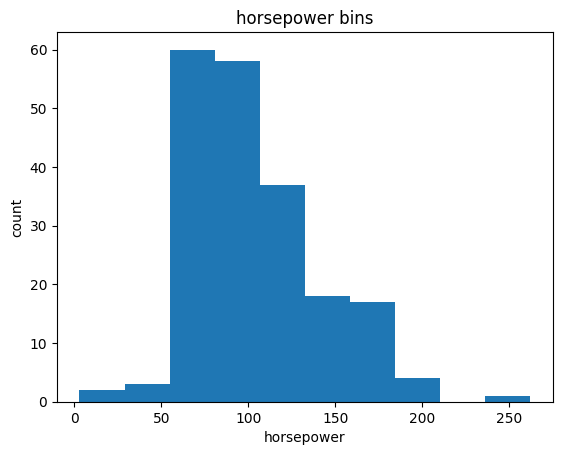

In [34]:
#Plotting to see the distribution
%matplotlib inline
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [27]:
#Finding 3 equal size bins using numpy's linspance 
#For building 3 bins of equal lenght, 4 dividers are being used
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([  3.        ,  89.33333333, 175.66666667, 262.        ])

In [28]:
#Naming and labeling the groups
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Medium
1,154,Medium
2,102,Medium
3,115,Medium
4,110,Medium
5,110,Medium
6,110,Medium
7,140,Medium
8,101,Medium
9,101,Medium


In [29]:
df["horsepower-binned"].value_counts() #number of cars in each bin

horsepower-binned
Medium    100
Low        88
High       12
Name: count, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

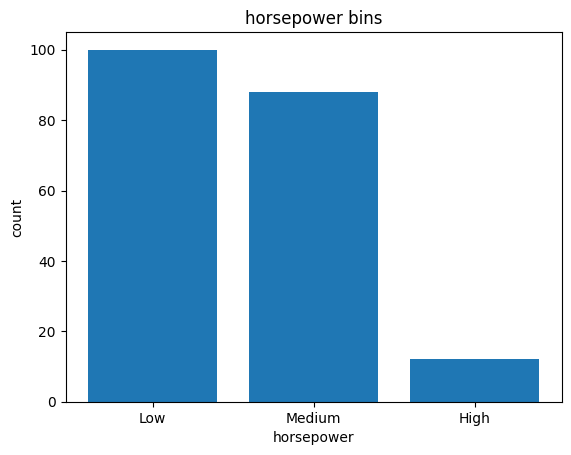

In [38]:
#Plotting the distribution in each bin
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")
#Intervals are now narrowed down from 59 to 3

Text(0.5, 1.0, 'horsepower bins')

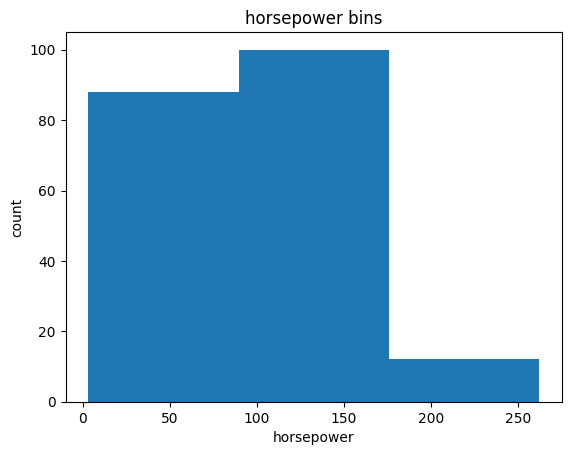

In [39]:
#Vizualizing the distribution of bins using histogram
plt.pyplot.hist(df["horsepower"], bins = 3)


plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [41]:
#Using 'dummy variables' to label fuel types for regression analysis.

dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [42]:
#Chaning the column names for clarity
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [43]:
# merge data frame and dummy variable and drop original column 
df = pd.concat([df, dummy_variable_1], axis=1)


df.drop("fuel-type", axis = 1, inplace=True)

In [44]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,16500.0,11.190476,8.703704,Medium,False,True
1,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,16500.0,12.368421,9.038462,Medium,False,True
2,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,13950.0,9.791667,7.833333,Medium,False,True
3,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,17450.0,13.055556,10.681818,Medium,False,True
4,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,3.40,8.5,110,5500.0,15250.0,12.368421,9.400000,Medium,False,True


In [45]:
# repeating same process for aspiration column
dummy_variable_2 = pd.get_dummies(df['aspiration'])


dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)


dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [46]:

df = pd.concat([df, dummy_variable_2], axis=1)


df.drop('aspiration', axis = 1, inplace=True)

In [47]:
df.to_csv('clean_df.csv') #saving cleaned csv